In [ ]:
import os
import pathlib
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [ ]:
path = os.getcwd()

print(path)

/content


In [ ]:
data_path = "/zillow_data_simple_3.csv" 

df = pd.read_csv(data_path)
df = pd.get_dummies(df)

FileNotFoundError: ignored

In [ ]:
df.head()

,Zestimate,Price,Rent_Zestimate,Bathrooms,Bedrooms,Living_Area,Avg_Income_Per_Capita,logZestimate,logPrice,logRentzestimate,Price_per_sqft,Total_Housing_Units_By_Zip,Homeowner_Vacancy_Rate_By_Zip,Percent_Occupied_Housing_Lacking_Complete_Plumbing_Facilities,Percent_Occupied_Housing_Lacking_Complete_Kitchen_Facilities,Percent_Occupied_Housing_No_Telephone_Service_Available,Typical_Home_Value_Mar21,Avg_Typical_Home_Value_Over_Past_10yrs,Avg_Yearly_Value_Growth_Rate,Home_Type_APARTMENT,Home_Type_CONDO,Home_Type_MANUFACTURED,Home_Type_MULTI_FAMILY,Home_Type_SINGLE_FAMILY,Home_Type_TOWNHOUSE,Zip_Zip_90001,Zip_Zip_90004,Zip_Zip_90005,Zip_Zip_90006,Zip_Zip_90010,Zip_Zip_90011,Zip_Zip_90012,Zip_Zip_90013,Zip_Zip_90015,Zip_Zip_90018,Zip_Zip_90019,Zip_Zip_90020,Zip_Zip_90021,Zip_Zip_90022,Zip_Zip_90023,...,Zip_Zip_92835,Zip_Zip_92840,Zip_Zip_92845,Zip_Zip_92861,Zip_Zip_92865,Zip_Zip_92866,Zip_Zip_92867,Zip_Zip_92868,Zip_Zip_92869,Zip_Zip_92870,Zip_Zip_92881,Zip_Zip_92883,Zip_Zip_92886,Zip_Zip_93010,Zip_Zip_93012,Zip_Zip_93021,Zip_Zip_93063,Zip_Zip_93065,Zip_Zip_93109,Zip_Zip_93222,Zip_Zip_93401,Zip_Zip_93405,Zip_Zip_93420,Zip_Zip_93422,Zip_Zip_93433,Zip_Zip_93446,Zip_Zip_93449,Zip_Zip_93451,Zip_Zip_93510,Zip_Zip_93532,Zip_Zip_93534,Zip_Zip_93535,Zip_Zip_93536,Zip_Zip_93543,Zip_Zip_93550,Zip_Zip_93551,Zip_Zip_93552,Zip_Zip_93553,Zip_Zip_93560,Zip_Zip_93561
0,510735,556000,2750,3.0,2,1442,102,13.143606,13.228524,7.919356,385.575589,9360,0.4,0.0,2.6,1.9,604012,4.405899e+05,7.567484,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,902904,840750,3900,3.0,3,1741,215,13.713372,13.642050,8.268732,482.912120,16957,2.0,0.4,0.4,0.9,2189923,1.668160e+06,6.356494,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,799515,865000,3200,3.0,3,1600,121,13.591761,13.670485,8.070906,540.625000,5882,2.0,0.2,0.2,1.6,859991,6.819901e+05,5.528814,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1096626,1095000,3950,3.0,4,2606,150,13.907749,13.906265,8.281471,420.184190,11249,1.3,0.1,0.2,0.8,1065062,8.564405e+05,5.016141,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2815027,2875000,6817,4.0,4,3350,215,14.850482,14.871563,8.827175,858.208955,16957,2.0,0.4,0.4,0.9,2189923,1.668160e+06,6.356494,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,Zestimate,Price,Rent_Zestimate,Bathrooms,Bedrooms,Living_Area,Avg_Income_Per_Capita,logZestimate,logPrice,logRentzestimate,Price_per_sqft,Total_Housing_Units_By_Zip,Homeowner_Vacancy_Rate_By_Zip,Percent_Occupied_Housing_Lacking_Complete_Plumbing_Facilities,Percent_Occupied_Housing_Lacking_Complete_Kitchen_Facilities,Percent_Occupied_Housing_No_Telephone_Service_Available,Typical_Home_Value_Mar21,Avg_Typical_Home_Value_Over_Past_10yrs,Avg_Yearly_Value_Growth_Rate,Home_Type_APARTMENT,Home_Type_CONDO,Home_Type_MANUFACTURED,Home_Type_MULTI_FAMILY,Home_Type_SINGLE_FAMILY,Home_Type_TOWNHOUSE,Zip_Zip_90001,Zip_Zip_90004,Zip_Zip_90005,Zip_Zip_90006,Zip_Zip_90010,Zip_Zip_90011,Zip_Zip_90012,Zip_Zip_90013,Zip_Zip_90015,Zip_Zip_90018,Zip_Zip_90019,Zip_Zip_90020,Zip_Zip_90021,Zip_Zip_90022,Zip_Zip_90023,...,Zip_Zip_92835,Zip_Zip_92840,Zip_Zip_92845,Zip_Zip_92861,Zip_Zip_92865,Zip_Zip_92866,Zip_Zip_92867,Zip_Zip_92868,Zip_Zip_92869,Zip_Zip_92870,Zip_Zip_92881,Zip_Zip_92883,Zip_Zip_92886,Zip_Zip_93010,Zip_Zip_93012,Zip_Zip_93021,Zip_Zip_93063,Zip_Zip_93065,Zip_Zip_93109,Zip_Zip_93222,Zip_Zip_93401,Zip_Zip_93405,Zip_Zip_93420,Zip_Zip_93422,Zip_Zip_93433,Zip_Zip_93446,Zip_Zip_93449,Zip_Zip_93451,Zip_Zip_93510,Zip_Zip_93532,Zip_Zip_93534,Zip_Zip_93535,Zip_Zip_93536,Zip_Zip_93543,Zip_Zip_93550,Zip_Zip_93551,Zip_Zip_93552,Zip_Zip_93553,Zip_Zip_93560,Zip_Zip_93561
count,2.080000e+03,2.080000e+03,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2.080000e+03,2.080000e+03,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,...,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,8.770668e+05,8.685965e+05,3554.085577,2.679087,3.286538,2003.587500,124.789904,13.487068,13.462927,8.063820,449.045702,14763.359615,1.104663,0.369904,1.058558,1.333125,7.981114e+05,5.797107e+05,7.635440,0.001442,0.144712,0.018750,0.005288,0.762019,0.067788,0.000962,0.007692,0.002885,0.000962,0.001442,0.001923,0.002404,0.001923,0.001442,0.000481,0.000962,0.003846,0.001442,0.001442,0.003365,...,0.000962,0.000962,0.000481,0.000481,0.001442,0.000481,0.002404,0.000481,0.001923,0.001442,0.000962,0.000481,0.002885,0.000962,0.000481,0.000481,0.000481,0.001442,0.000481,0.000962,0.000962,0.001442,0.001442,0.000962,0.000962,0.004327,0.001442,0.000481,0.000481,0.001442,0.000481,0.010096,0.003365,0.000962,0.001442,0.002404,0.004808,0.000481,0.000481,0.000962
std,7.187918e+05,7.293540e+05,2581.997440,1.126347,1.103849,1088.366396,27.918396,0.596878,0.661044,0.407746,235.300288,6400.152252,1.038843,1.111433,1.381240,0.734011,3.832494e+05,2.750159e+05,2.040619,0.037959,0.351894,0.135673,0.072547,0.425950,0.251443,0.031001,0.087389,0.053644,0.031001,0.037959,0.043821,0.048982,0.043821,0.037959,0.021926,0.031001,0.061913,0.037959,0.037959,0.057928,...,0.031001,0.031001,0.021926,0.021926,0.037959,0.021926,0.048982,0.021926,0.043821,0.037959,0.031001,0.021926,0.053644,0.031001,0.021926,0.021926,0.021926,0.037959,0.021926,0.031001,0.031001,0.037959,0.037959,0.031001,0.031001,0.065653,0.037959,0.021926,0.021926,0.037959,0.021926,0.099995,0.057928,0.031001,0.037959,0.048982,0.069187,0.021926,0.021926,0.031001
min,2.456600e+04,1.200000e+03,1300.000000,1.000000,0.000000,380.000000,96.000000,10.109119,7.090077,7.170120,0.829302,552.000000,0.000000,0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9af4595910>]],
      dtype=object)

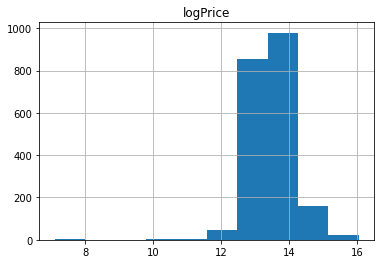

In [ ]:
df.hist('logPrice')

 Model 1 with logs

In [ ]:
# Your code goes here
from sklearn.model_selection import train_test_split

column_names = df.columns
predictor_columns = np.setdiff1d(column_names,['Zestimate', 'Price','Rent_Zestimate','logprice'])  

#predictor_columns = predictor_columns[predictor_columns != 'Bathrooms']

X = df[predictor_columns]
Y = df['logprice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Fit linear model
model = LinearRegression()
model.fit(X_train, Y_train)
# Evaluate model with mean squared error; just as an example
coeff_df = pd.DataFrame(model.coef_, predictor_columns,columns = ['Coefficient'])
#mse = mean_squared_error(Y_test, model.predict(X_test))
coeff_df

,Coefficient
Avg_Income_Per_Capita,1.045145e-03
Bathrooms,-1.823237e-02
Bedrooms,1.209789e-02
Home_Type_APARTMENT,-1.724562e-03
Home_Type_CONDO,9.198255e-03
...,...
Zip_Zip_93553,-3.748113e-13
Zip_Zip_93560,2.997967e-02
Zip_Zip_93561,-3.975119e-02
logZestimate,9.056127e-01


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df_test = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_test = df_test[df_test['Predicted'] <= 50]
df_test = df_test[df_test['Predicted'] >= 0]

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.07758417303401226
Mean Squared Error: 0.03777293497541804
Root Mean Squared Error: 0.19435260475593846


In [ ]:

SS_Residual = sum((Y_test-y_pred)**2)       
SS_Total = sum((Y_test-np.mean(Y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)


0.8998322503378242 0.4368948127099307


Model number 2 without Logs

In [ ]:
# Your code goes here
from sklearn.model_selection import train_test_split
from sklearn import metrics

column_names = df.columns
predictor_columns = np.setdiff1d(column_names,['logzestimate', 'Price','logrentzestimate','logprice'])  

#predictor_columns = predictor_columns[predictor_columns != 'Bathrooms']

X = df[predictor_columns]
Y = df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit linear model
model = LinearRegression()
model.fit(X_train, Y_train)
# Evaluate model with mean squared error; just as an example
coeff_df = pd.DataFrame(model.coef_, predictor_columns,columns = ['Coefficient'])
#mse = mean_squared_error(Y_test, model.predict(X_test))
coeff_df

,Coefficient
Avg_Income_Per_Capita,3.767201e+04
Avg_Typical_Home_Value_Over_Past_10yrs,-8.932262e+03
Avg_Yearly_Value_Growth_Rate,-5.887271e+08
Bathrooms,2.844646e+04
Bedrooms,2.327695e+04
...,...
Zip_Zip_93560,-2.879521e+09
Zip_Zip_93561,2.402548e+09
logPrice,2.956964e+05
logRentzestimate,-3.379350e+05


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df_test = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_test

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 111408.61460184879
Mean Squared Error: 111635052731.71623
Root Mean Squared Error: 334118.3214547149


In [ ]:

SS_Residual = sum((Y_test-y_pred)**2)       
SS_Total = sum((Y_test-np.mean(Y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)


0.8396699993557921 0.08633862646588386


###Linear Regression Model w/ new data file, 4/25

In [ ]:
# Splitting the data

from sklearn.model_selection import train_test_split
from sklearn import metrics

predictor_columns = list(df.drop(["Price", "logPrice"], axis="columns").columns)

# Set randomness
#np.random.seed(25)
#shuffled_df = df.sample(frac = 1)

X = df[predictor_columns]
Y = df['Price'] 

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
def plot_example(X, Y, functions):
    # Get some X's to plot the functions
    X_test = pd.DataFrame(np.linspace(0, 1, 100), columns=['X'])
    # Plot stuff
    for key in functions:
        plt.plot(X_test, functions[key](X_test), label=key)
    plt.scatter(X, Y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

functions = {}

In [ ]:
# Linear Regression Model

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

Linear_model = LinearRegression()
Linear_model.fit(X_train, Y_train)

# Evaluate model with mean squared error; just as an example
mse = mean_squared_error(Y_train, Linear_model.predict(X_train))
mse
# Plot results
#functions["Model"] = Linear_model.predict
#plot_example(X_train['Living_Area'], Y_train, functions)

#Note how you can customize your plots
#plt.title("Linear Model\n MSE: %.2f" % mse)
#plt.show()

14444742155.852491

In [ ]:
# Evaluate model with mean squared error; just as an example
coeff_df = pd.DataFrame(Linear_model.coef_, predictor_columns,columns = ['Coefficient'])
#mse = mean_squared_error(Y_test, model.predict(X_test))
coeff_df

,Coefficient
Zestimate,0.632089
Rent_Zestimate,78.041503
Bathrooms,32734.970782
Bedrooms,28724.309945
Living_Area,97.245906
...,...
Zip_Zip_93551,26763.693424
Zip_Zip_93552,13554.612618
Zip_Zip_93553,134760.353433
Zip_Zip_93560,803.031394


In [ ]:
# Cross Validation with Ten fold

from sklearn.model_selection import cross_val_score

scores = cross_val_score(Linear_model, X_train, Y_train, scoring="accuracy", cv=10)
print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std()))

In [ ]:
# ROC Area using cross validation

avg_ROC_auc = cross_val_score(Linear_model, X_train, Y_train, cv=10, scoring="roc_auc").mean()
print ("Cross Validated ROC AUC: %0.3f" % (avg_ROC_auc))

In [ ]:
plt.figure(figsize=[10,10])

for c in [0.01, 0.05, .1, 1]:
    model_logReg = LogisticRegression(C=c, solver='liblinear')
    model_logReg.fit(X_train, Y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model_logReg.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    
    # Compute (estimate) the area under the curve (AUC)
    auc = np.mean(cross_val_score(model_logReg, X, Y, scoring="roc_auc", cv=5))

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="AUC (C=" + str(c) + ") = " + str(round(auc, 2)))
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc='best')